In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
# 音频文件路
audio_file = r"E:\数据集\ShipEar\data_preprocessing\4_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_25.wav"

waveform, sample_rate = librosa.load(audio_file, sr=16000)

frame_length = 2048
hop_length = 512

In [18]:
def plot_mfcc(mfccs, sample_rate):
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
    plt.colorbar(format='%+2.0f')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

def plot_mfcc_raw(mfccs, sample_rate, out_path="mfcc.png"):
    mpl.rcParams['figure.facecolor'] = 'white'
    mpl.rcParams['axes.facecolor'] = 'white'

    fig, ax = plt.subplots(figsize=(12, 8))
    librosa.display.specshow(mfccs, x_axis=None, sr=sample_rate, ax=ax)

    ax.axis('off')
    fig.tight_layout(pad=0)
    fig.savefig(out_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

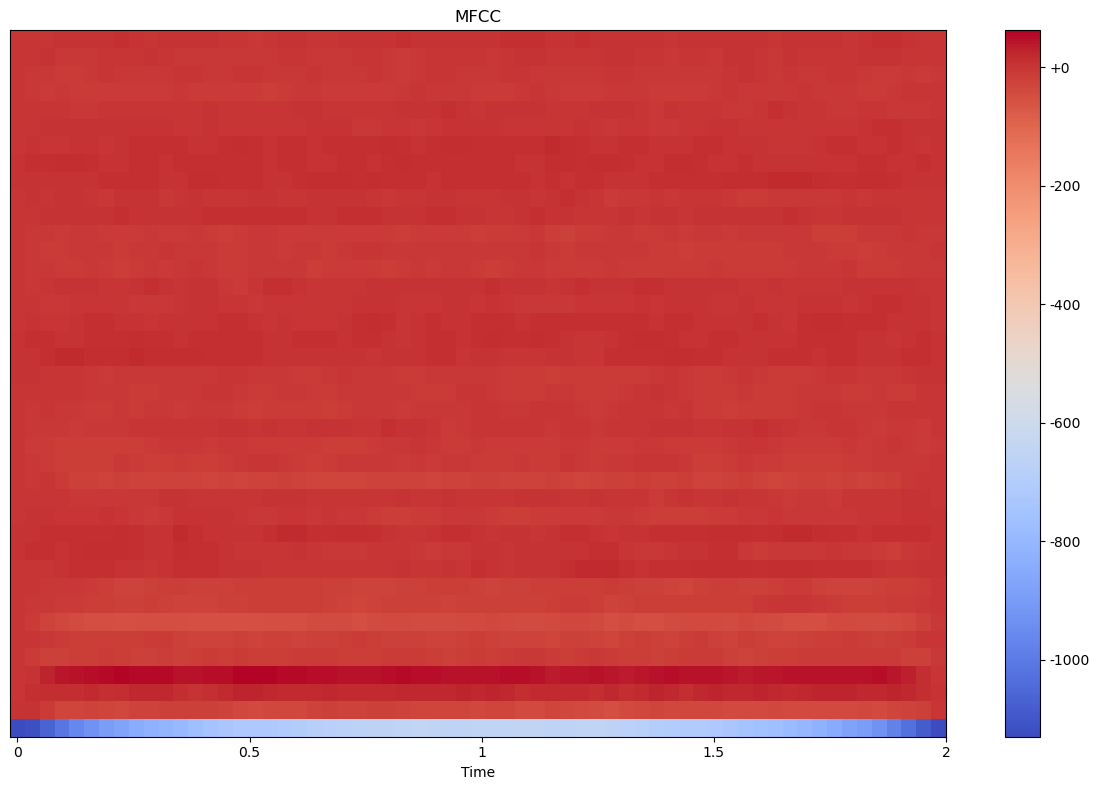

In [19]:
mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40)
plot_mfcc(mfccs, sample_rate)
plot_mfcc_raw(mfccs, sample_rate, out_path="mfcc_raw.png")

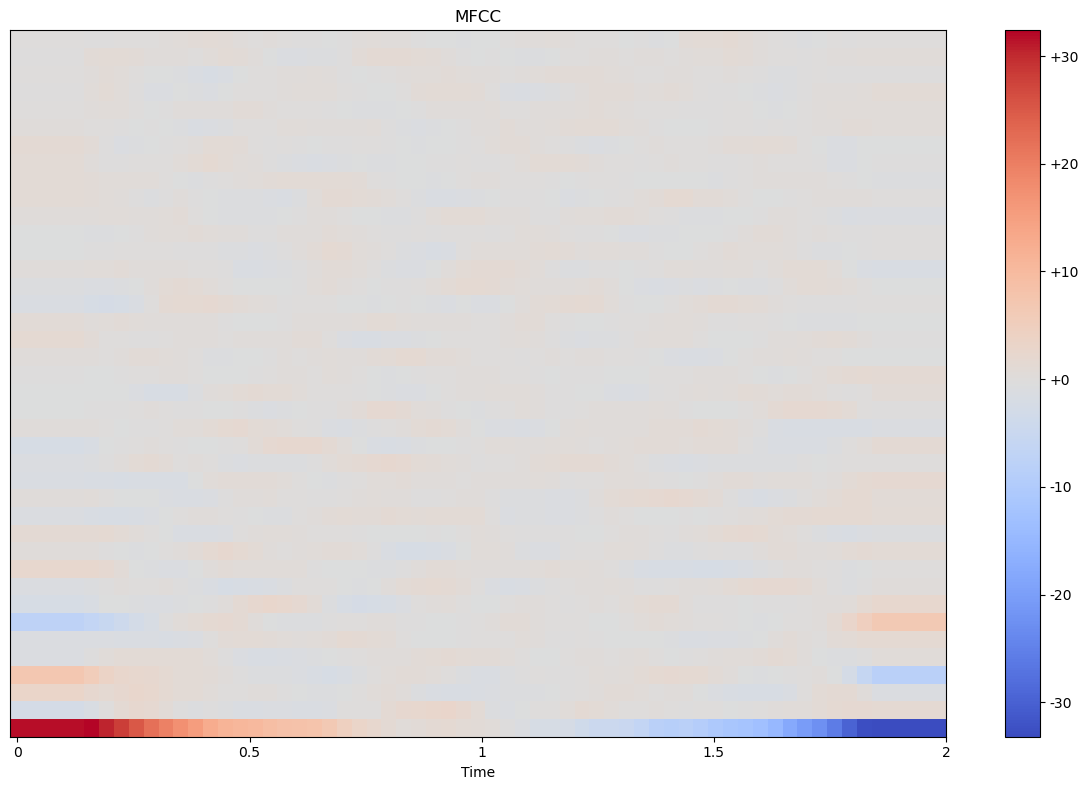

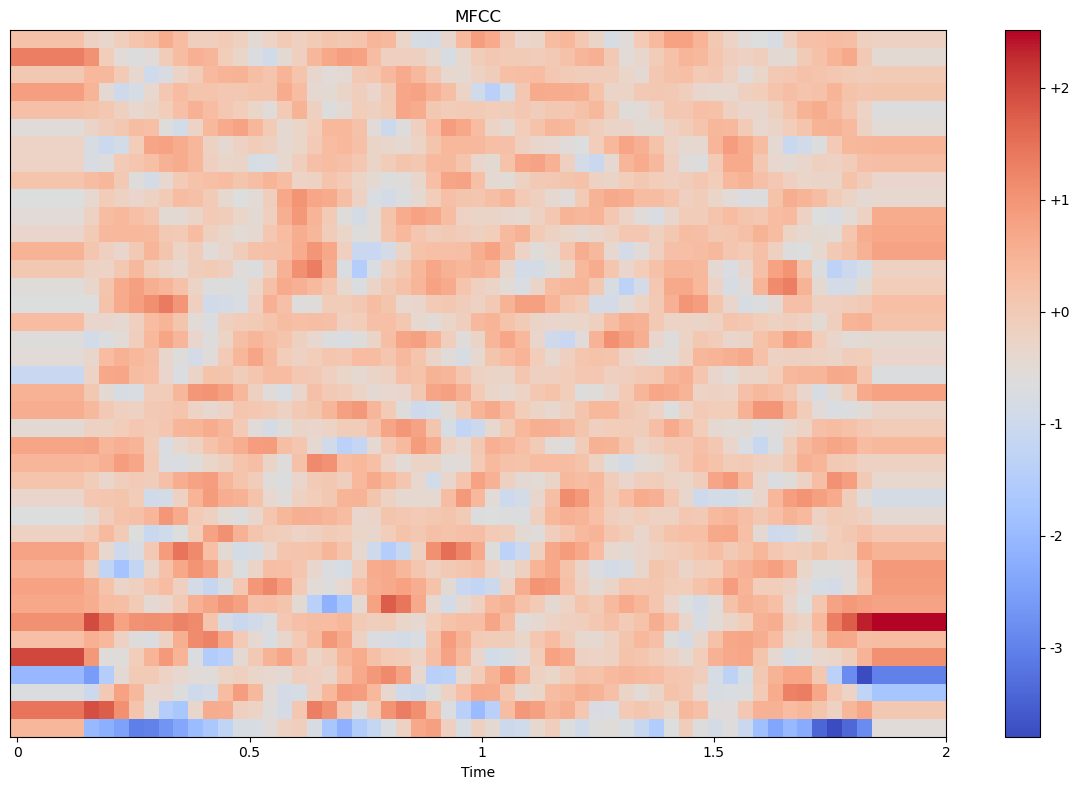

In [8]:
delta_mfccs = librosa.feature.delta(mfccs)
plot_mfcc(delta_mfccs, sample_rate)

delta2_mfccs = librosa.feature.delta(mfccs, order=2)
plot_mfcc(delta2_mfccs, sample_rate)

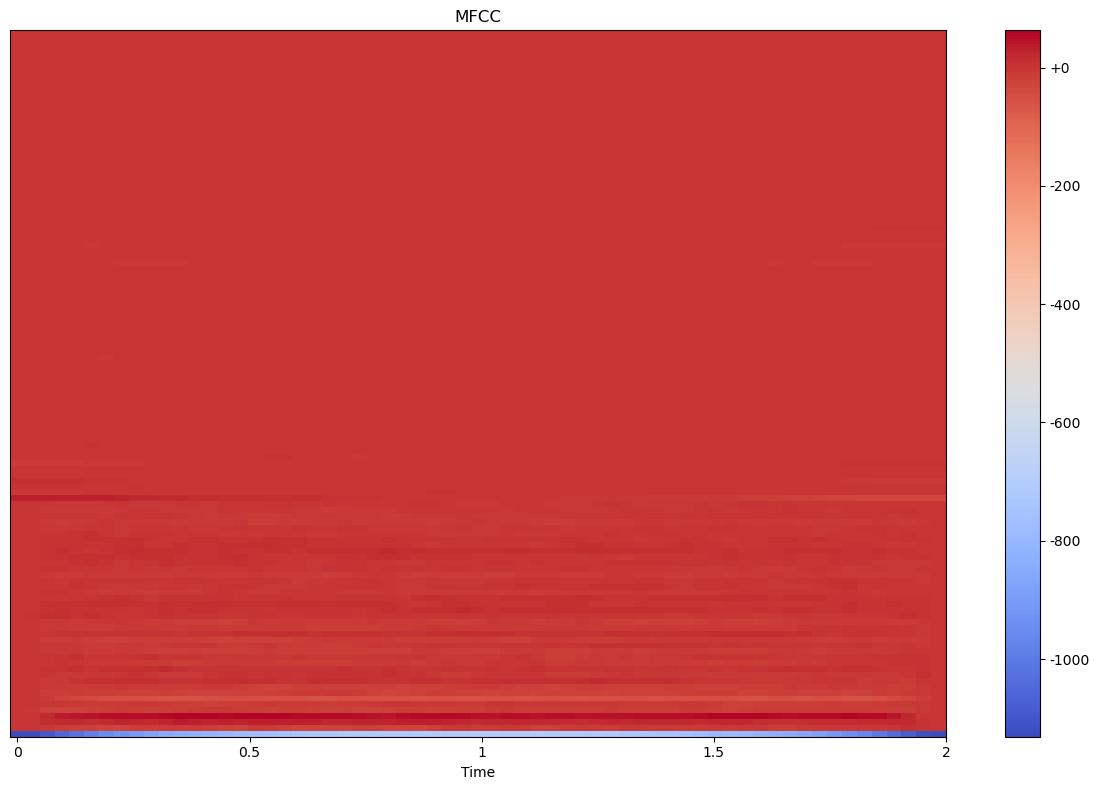

In [9]:
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
plot_mfcc(comprehensive_mfccs, sample_rate)